In [270]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [271]:
Stock = yf.download("^NSEI", start='2021-04-01',
                                      end='2023-05-23');
Stock

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,14798.400391,14883.200195,14692.450195,14867.349609,14867.349609,445000
2021-04-05,14837.700195,14849.849609,14459.500000,14637.799805,14637.799805,509700
2021-04-06,14737.000000,14779.099609,14573.900391,14683.500000,14683.500000,475300
2021-04-07,14716.450195,14879.799805,14649.849609,14819.049805,14819.049805,0
2021-04-08,14875.650391,14984.150391,14821.099609,14873.799805,14873.799805,514800
...,...,...,...,...,...,...
2023-05-16,18432.349609,18432.349609,18264.349609,18286.500000,18286.500000,219500
2023-05-17,18300.449219,18309.000000,18115.349609,18181.750000,18181.750000,229900
2023-05-18,18287.500000,18297.199219,18104.849609,18129.949219,18129.949219,272100


Donchian Channel

In [272]:
upper=Stock.High.rolling(16).max()
lower=Stock.Low.rolling(16).min()
mid=(upper + lower)/2
don_channel=pd.DataFrame()
don_channel['upper']=upper
don_channel['lower']=lower
don_channel['mid']=mid
don_channel

,upper,lower,mid
Date,,,
2021-04-01,NaN,NaN,NaN
2021-04-05,NaN,NaN,NaN
2021-04-06,NaN,NaN,NaN
2021-04-07,NaN,NaN,NaN
2021-04-08,NaN,NaN,NaN
...,...,...,...
2023-05-16,18458.900391,17612.500000,18035.700195
2023-05-17,18458.900391,17711.199219,18085.049805
2023-05-18,18458.900391,17711.199219,18085.049805


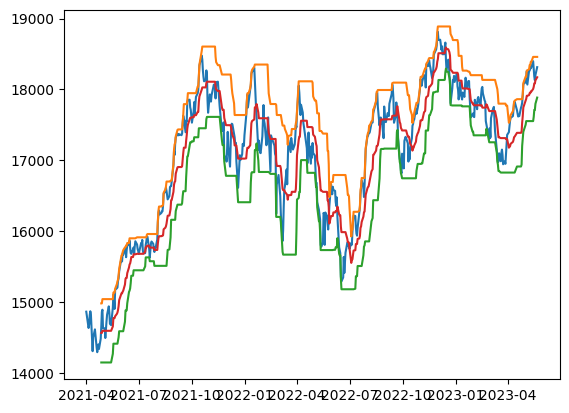

In [273]:
plt.plot( Stock.Close)
plt.plot(don_channel)
plt.show()

Volume Price Indicator Index

In [274]:
close=Stock.Close;
volume=Stock.Volume;
VPI=(close-close.shift())/(close.shift()) * (volume);
VPI = VPI.cumsum()
VPI


Date
2021-04-01             NaN
2021-04-05    -7869.696921
2021-04-06    -6385.778360
2021-04-07    -6385.778360
2021-04-08    -4483.814309
                  ...     
2023-05-16    39224.697560
2023-05-17    37907.768405
2023-05-18    37132.540906
2023-05-19    38189.543908
2023-05-22    39790.816163
Length: 529, dtype: float64

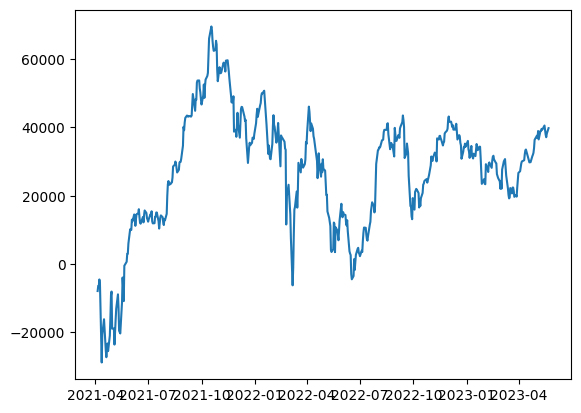

In [275]:
plt.plot(VPI)

Average Directional Index

In [276]:
plus_DM = np.where(Stock.High.diff()>Stock.Low.diff(), Stock.High.diff(),0)
plusDM=pd.DataFrame(plus_DM)
minus_DM = np.where(Stock.Low.diff()>Stock.High.diff(), Stock.Low.diff(),0)
minusDM = pd.DataFrame(minus_DM)


True_range = pd.DataFrame([Stock.High - Stock.Low, abs(Stock.High - Stock.Close.shift(1)),abs(Stock.Low - Stock.Close.shift(1))]).max()
smooth_tr = True_range.rolling(24).mean()
smooth_plus_DM = plusDM.ewm(span=24).mean()
smooth_minus_DM = minusDM.ewm(span=24, min_periods=24).mean()

DI=abs((smooth_plus_DM - smooth_minus_DM)/ (smooth_plus_DM + smooth_minus_DM))*100
ADX = (DI.shift(1)*13 + DI)/14
ADX


,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
524,19.944184
525,22.636107
526,3.719402
527,7.211793
